In [3]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import hftools.utils

In [5]:
import ROOT

In [6]:
f = ROOT.TFile.Open('./results/example_combined_Meas1_model.root')
ws = f.Get('combined')


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [7]:
def histo2bar(histo):
    data = np.array([(histo.GetBinCenter(i),histo.GetBinContent(i),histo.GetBinWidth(i)) for i in range(1,histo.GetNbinsX())])
    return data

def histo2scatter(histo):
    data = np.array([(histo.GetBinCenter(i),histo.GetBinContent(i)) for i in range(1,histo.GetNbinsX())])
    return data

In [8]:
def plot(mchistos,data):
    bottom = None
    for i,mc in enumerate(mchistos):
        bardata = histo2bar(mc)
        p1 = plt.bar(bardata[:,0], bardata[:,1], bardata[:,2], bottom = bottom, alpha = 0.4)
        bottom = bardata[:,1] if i==0 else bottom + bardata[:,1]
    
    scatdata = histo2scatter(data)
    plt.scatter(scatdata[:,0],scatdata[:,1], c = 'k')

In [9]:
def mk_plot(ws,**parvalues):
    plt.clf()
    for k,v in parvalues.iteritems():
        ws.var(k).setVal(v)
    hdata = hftools.utils.extract_data(ws,'channel1','x')
    hsignal = hftools.utils.extract(ws,'channel1','x','signal')
    hbackground1 = hftools.utils.extract(ws,'channel1','x','background1')
    hbackground2 = hftools.utils.extract(ws,'channel1','x','background2')
    plot([hbackground2,hbackground1,hsignal],hdata)
    hdata.Delete()
    hsignal.Delete()
    hbackground1.Delete()
    hbackground2.Delete()

<IPython.core.display.Javascript object>


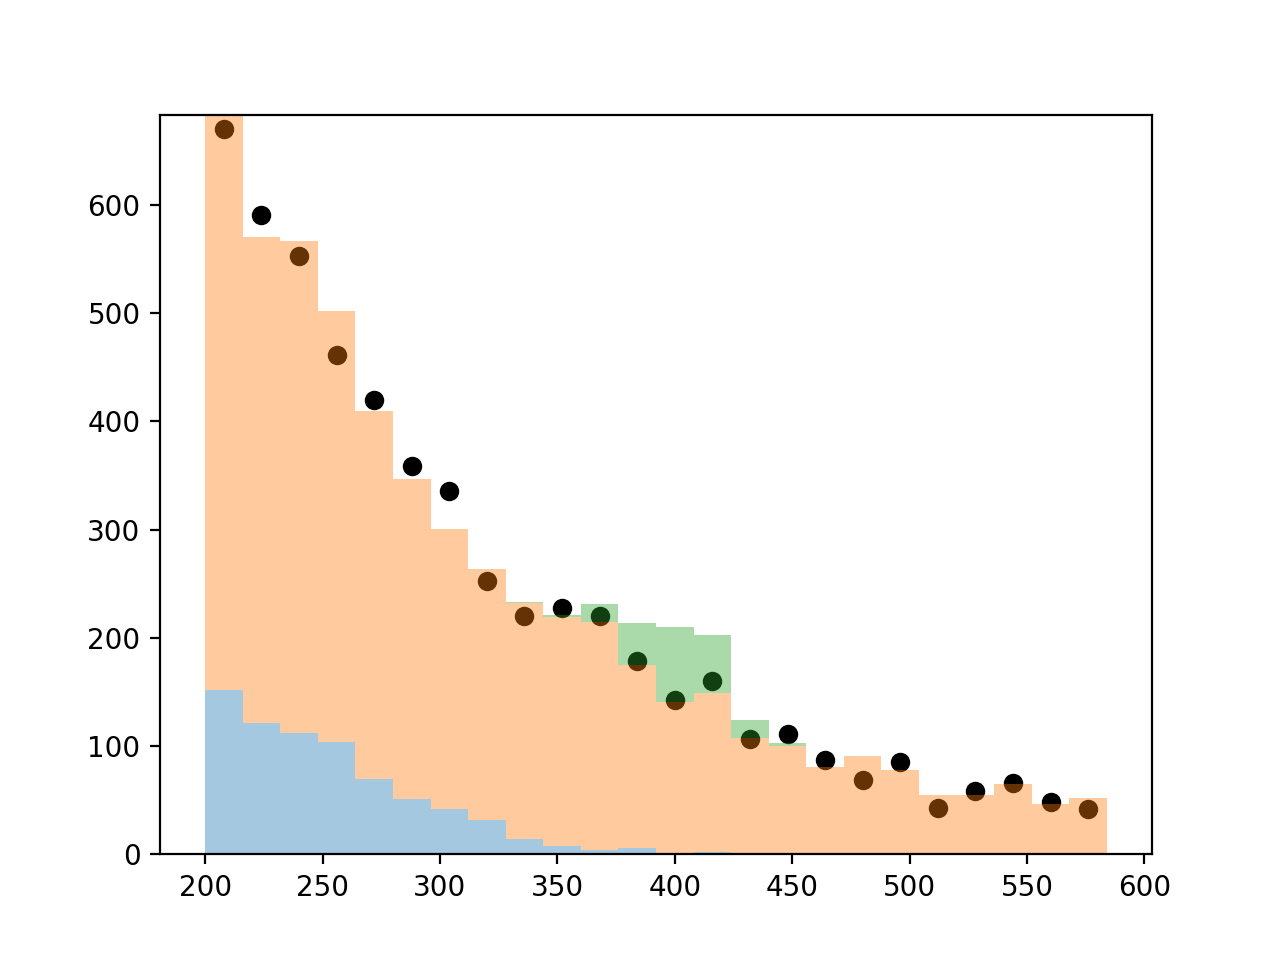

[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(L_x_signal_channel1_overallSyst_x_Exp) WARNING extended mode requested for a non-pdf object, ignored
[#1] INFO:InputArguments -- RooAbsReal::createHistogram(L_x_signal_channel1_overallSyst_x_Exp) INFO: Model has intrinsic binning definition, selecting that binning for the histogram
[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(L_x_background1_channel1_overallSyst_x_Exp) WARNING extended mode requested for a non-pdf object, ignored
[#1] INFO:InputArguments -- RooAbsReal::createHistogram(L_x_background1_channel1_overallSyst_x_Exp) INFO: Model has intrinsic binning definition, selecting that binning for the histogram
[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(L_x_background2_channel1_overallSyst_x_HistSyst) WARNING extended mode requested for a non-pdf object, ignored
[#1] INFO:InputArguments -- RooAbsReal::createHistogram(L_x_background2_channel1_overallSyst_x_HistSyst) INFO: Model has intrinsic binni

In [10]:
mk_plot(ws)

In [11]:
import itertools
it = ws.obj('ModelConfig').GetNuisanceParameters().fwdIterator()
pars = list(itertools.takewhile(lambda x: x, (it.next() for i in itertools.repeat(True))))

it = ws.obj('ModelConfig').GetParametersOfInterest().fwdIterator()
pars = pars + list(itertools.takewhile(lambda x: x, (it.next() for i in itertools.repeat(True))))

In [12]:
from ipywidgets import interact, fixed

<IPython.core.display.Javascript object>


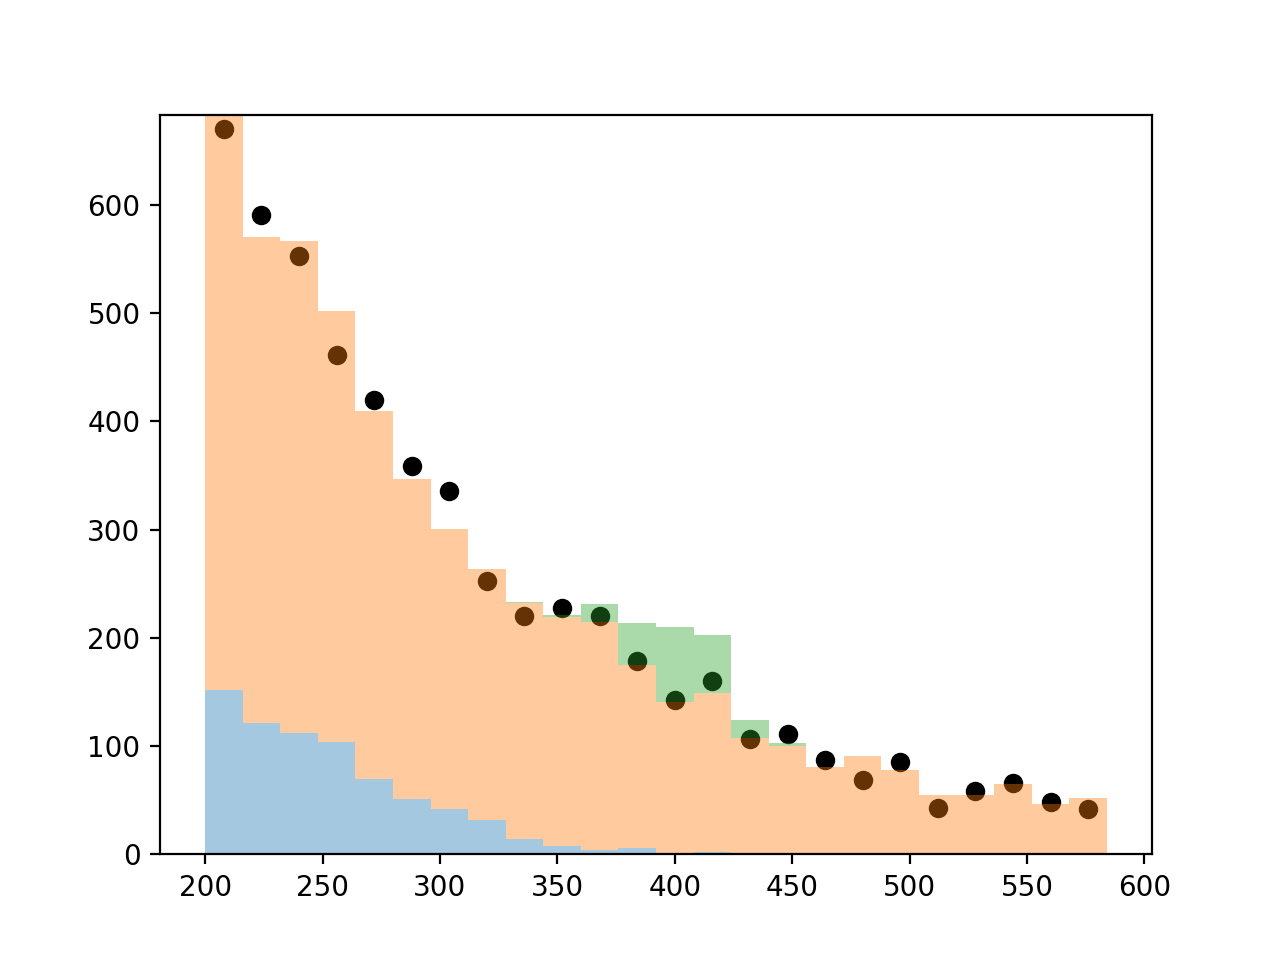

[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(L_x_signal_channel1_overallSyst_x_Exp) WARNING extended mode requested for a non-pdf object, ignored
[#1] INFO:InputArguments -- RooAbsReal::createHistogram(L_x_signal_channel1_overallSyst_x_Exp) INFO: Model has intrinsic binning definition, selecting that binning for the histogram
[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(L_x_background1_channel1_overallSyst_x_Exp) WARNING extended mode requested for a non-pdf object, ignored
[#1] INFO:InputArguments -- RooAbsReal::createHistogram(L_x_background1_channel1_overallSyst_x_Exp) INFO: Model has intrinsic binning definition, selecting that binning for the histogram
[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(L_x_background2_channel1_overallSyst_x_HistSyst) WARNING extended mode requested for a non-pdf object, ignored
[#1] INFO:InputArguments -- RooAbsReal::createHistogram(L_x_background2_channel1_overallSyst_x_HistSyst) INFO: Model has intrinsic binni

[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(L_x_signal_channel1_overallSyst_x_Exp) WARNING extended mode requested for a non-pdf object, ignored
[#1] INFO:InputArguments -- RooAbsReal::createHistogram(L_x_signal_channel1_overallSyst_x_Exp) INFO: Model has intrinsic binning definition, selecting that binning for the histogram
[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(L_x_background1_channel1_overallSyst_x_Exp) WARNING extended mode requested for a non-pdf object, ignored
[#1] INFO:InputArguments -- RooAbsReal::createHistogram(L_x_background1_channel1_overallSyst_x_Exp) INFO: Model has intrinsic binning definition, selecting that binning for the histogram
[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(L_x_background2_channel1_overallSyst_x_HistSyst) WARNING extended mode requested for a non-pdf object, ignored
[#1] INFO:InputArguments -- RooAbsReal::createHistogram(L_x_background2_channel1_overallSyst_x_HistSyst) INFO: Model has intrinsic binni

In [13]:
plt.figure()
interact(mk_plot, ws=fixed(ws),**{p.GetName():(p.getMin(),p.getMax()) for p in pars});